In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#%matplotlib inline

In [3]:
# Read CSV file to load data
df = pd.read_csv('Dataset_Transformation.csv', sep=';')
df

,Color,Size,Label
0,Black,S,1
1,White,L,0
2,Black,M,0
3,Black,M,1
4,Red,L,1
5,White,L,1
6,Black,S,0
7,Red,M,1
8,Black,L,0
9,Red,S,0


# One Hot Encoding

In [4]:
#one hot encoding of color
color_oh_encoded = pd.get_dummies(df['Color'], prefix='Color')
color_oh_encoded

,Color_Black,Color_Red,Color_White
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,True,False
5,False,False,True
6,True,False,False
7,False,True,False
8,True,False,False
9,False,True,False


In [5]:
#join new features to original data frame
df.join(color_oh_encoded, lsuffix='_df', rsuffix='_df2')

,Color,Size,Label,Color_Black,Color_Red,Color_White
0,Black,S,1,True,False,False
1,White,L,0,False,False,True
2,Black,M,0,True,False,False
3,Black,M,1,True,False,False
4,Red,L,1,False,True,False
5,White,L,1,False,False,True
6,Black,S,0,True,False,False
7,Red,M,1,False,True,False
8,Black,L,0,True,False,False
9,Red,S,0,False,True,False


# Target Encoding

In [6]:
df

,Color,Size,Label
0,Black,S,1
1,White,L,0
2,Black,M,0
3,Black,M,1
4,Red,L,1
5,White,L,1
6,Black,S,0
7,Red,M,1
8,Black,L,0
9,Red,S,0


In [7]:
mean_color_encode = df.groupby('Color')['Label'].mean()
mean_color_encode

Color
Black    0.400000
Red      0.666667
White    0.500000
Name: Label, dtype: float64

In [8]:
df['Target Encoded Color']=df['Color'].map(mean_color_encode)
df

,Color,Size,Label,Target Encoded Color
0,Black,S,1,0.400000
1,White,L,0,0.500000
2,Black,M,0,0.400000
3,Black,M,1,0.400000
4,Red,L,1,0.666667
5,White,L,1,0.500000
6,Black,S,0,0.400000
7,Red,M,1,0.666667
8,Black,L,0,0.400000
9,Red,S,0,0.666667


In [9]:
df.drop('Target Encoded Color',axis=1,inplace=True)

# Ordinal Encoding

In [10]:
df

,Color,Size,Label
0,Black,S,1
1,White,L,0
2,Black,M,0
3,Black,M,1
4,Red,L,1
5,White,L,1
6,Black,S,0
7,Red,M,1
8,Black,L,0
9,Red,S,0


In [11]:
Size_dict = {'S': 1, 'M':2, 'L':3}
df['Size Ordinal'] = df['Size'].map(Size_dict)
df

,Color,Size,Label,Size Ordinal
0,Black,S,1,1
1,White,L,0,3
2,Black,M,0,2
3,Black,M,1,2
4,Red,L,1,3
5,White,L,1,3
6,Black,S,0,1
7,Red,M,1,2
8,Black,L,0,3
9,Red,S,0,1


# Binning

In [12]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
df=iris.data
df['label']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
df['sepal_length_binned']=pd.cut(df['sepal length (cm)'], 10)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,sepal_length_binned
0,5.1,3.5,1.4,0.2,0,"(5.02, 5.38]"
1,4.9,3.0,1.4,0.2,0,"(4.66, 5.02]"
2,4.7,3.2,1.3,0.2,0,"(4.66, 5.02]"
3,4.6,3.1,1.5,0.2,0,"(4.296, 4.66]"
4,5.0,3.6,1.4,0.2,0,"(4.66, 5.02]"
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,"(6.46, 6.82]"
146,6.3,2.5,5.0,1.9,2,"(6.1, 6.46]"
147,6.5,3.0,5.2,2.0,2,"(6.46, 6.82]"
148,6.2,3.4,5.4,2.3,2,"(6.1, 6.46]"


In [14]:
#show different bins
df['sepal_length_binned'].unique()

[(5.02, 5.38], (4.66, 5.02], (4.296, 4.66], (5.38, 5.74], (5.74, 6.1], (6.82, 7.18], (6.1, 6.46], (6.46, 6.82], (7.54, 7.9], (7.18, 7.54]]
Categories (10, interval[float64, right]): [(4.296, 4.66] < (4.66, 5.02] < (5.02, 5.38] < (5.38, 5.74] ... (6.46, 6.82] < (6.82, 7.18] < (7.18, 7.54] < (7.54, 7.9]]

# Visual Normality Checks

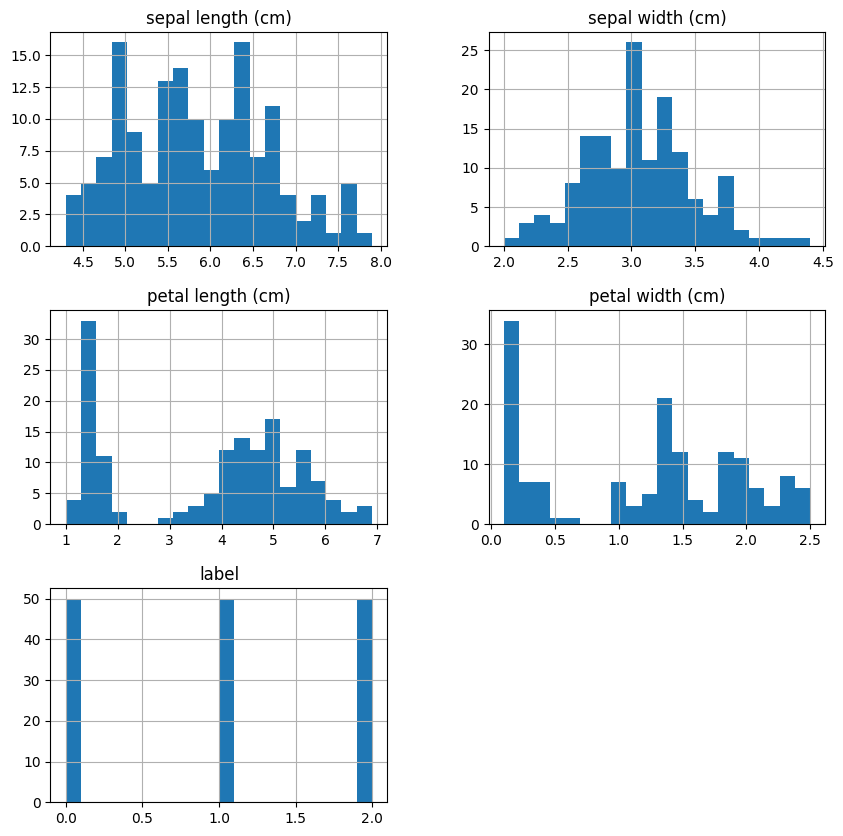

In [15]:
# histogram plot
hist = df.hist(bins=20,figsize=(10, 10))

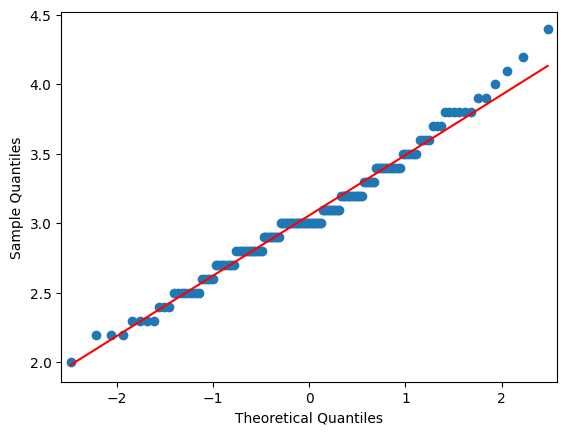

In [16]:
#Quantile-Quantile Plot
# QQ Plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(df['sepal width (cm)'], line='s')
pyplot.show()

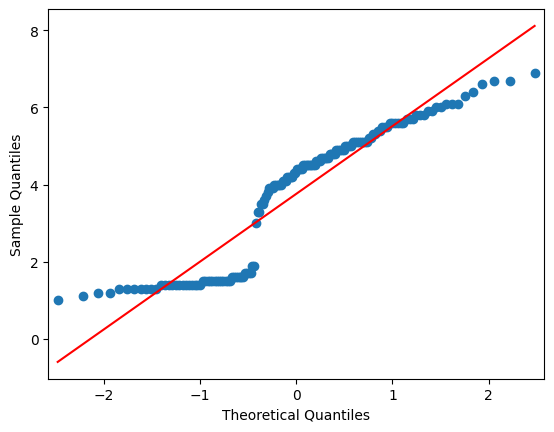

In [17]:
qqplot(df['petal length (cm)'], line='s')
pyplot.show()

# Statistical Skew and Normality Checks

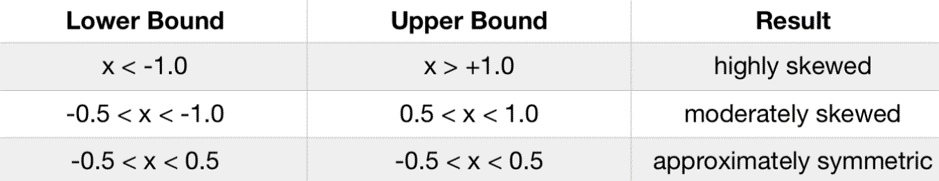

In [18]:
df['sepal length (cm)'].skew()

np.float64(0.3149109566369728)

In [19]:
df['petal length (cm)'].skew()

np.float64(-0.27488417975101115)

In [20]:
# Shapiro-Wilk Test
from scipy.stats import shapiro

def shapiro_wilk_test(data,alpha):
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.5f' % (stat, p))
    # interpret
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

shapiro_wilk_test(df['sepal length (cm)'],0.05)       

Statistics=0.976, p=0.01018
Sample does not look Gaussian (reject H0)


In [21]:
shapiro_wilk_test(df['petal length (cm)'],0.05)

Statistics=0.876, p=0.00000
Sample does not look Gaussian (reject H0)


# Transform to normal distribution - Quantile Transformer

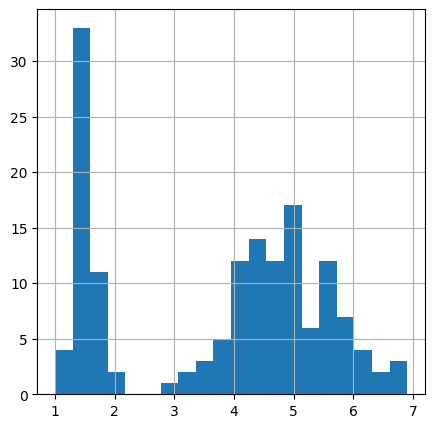

In [22]:
hist = df['petal length (cm)'].hist(bins=20,figsize=(5, 5))

<Axes: >

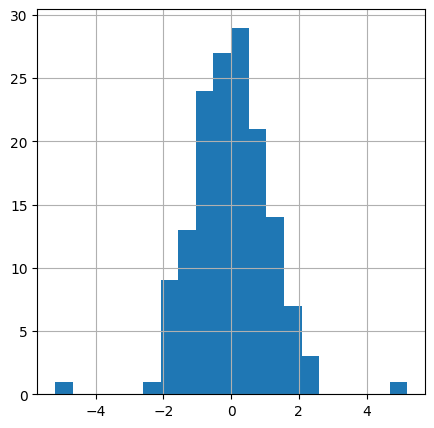

In [23]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(n_quantiles=25, output_distribution='normal',random_state=0)
trans_x=qt.fit_transform(np.array(df['petal length (cm)'].array.reshape(-1, 1)))

df['petal length (cm) qtransformed']=trans_x

df['petal length (cm) qtransformed'].hist(bins=20,figsize=(5, 5))

In [24]:
# even after quantile transformer does not pass SW test
shapiro_wilk_test(df['petal length (cm) qtransformed'],0.05)

Statistics=0.949, p=0.00003
Sample does not look Gaussian (reject H0)


array([[<Axes: title={'center': '0'}>]], dtype=object)

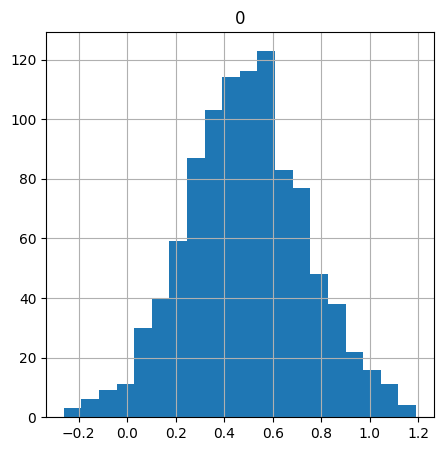

In [25]:
#let's build a normal distribution which passes the test
rng = np.random.RandomState(0)
x = np.sort(rng.normal(loc=0.5, scale=0.25, size=(1000, 1)), axis=0)
df_new=pd.DataFrame(x)
df_new.hist(bins=20,figsize=(5, 5))

In [26]:
shapiro_wilk_test(df_new,0.05)

Statistics=0.999, p=0.59123
Sample looks Gaussian (fail to reject H0)


# Transform to normal distribution - Power Transformation

<Axes: >

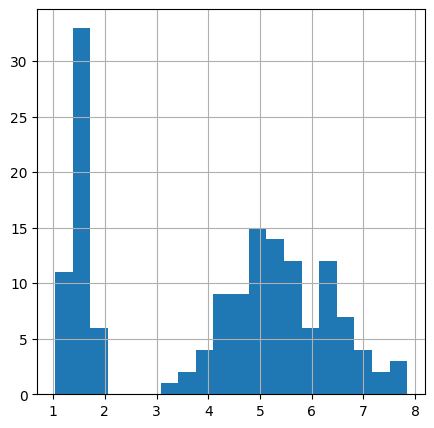

In [27]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(standardize=False)
trans_x= pt.fit_transform(np.array(df['petal length (cm)'].array.reshape(-1, 1)))

df['petal length (cm) ptransformed']=trans_x

df['petal length (cm) ptransformed'].hist(bins=20,figsize=(5, 5))
#Does not work in this example - skew is not clear enough

array([[<Axes: title={'center': '0'}>]], dtype=object)

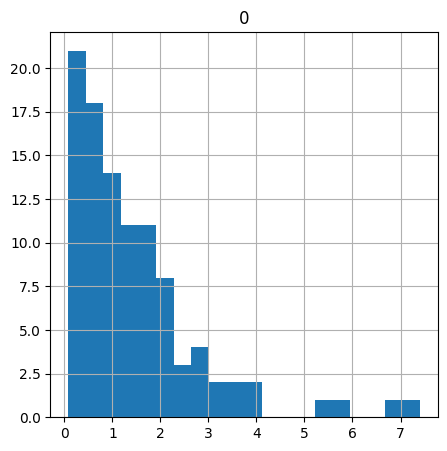

In [28]:
#create a dataset with clearer skew
x_lognormal = np.random.RandomState(916).lognormal(size=(100,1))
df_new=pd.DataFrame(x_lognormal)
df_new.hist(bins=20,figsize=(5, 5))

<Axes: >

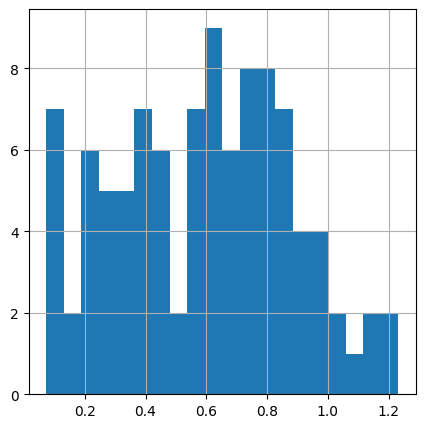

In [29]:
trans_x= pt.fit_transform(np.array(df_new))

df_new['ptransformed']=trans_x

df_new['ptransformed'].hist(bins=20,figsize=(5, 5))